In [1]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import tensorflow as tf

### 데이터 로드 & 텍스트로 복원

In [2]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=8000, test_split=0.2)

print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

2121728/2110848 [==============================] - 0s 0us/step
훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [3]:
print(x_train[0])
print(x_test[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]


In [4]:
print(len(set(y_train)))  # 46개의 클래스로 구성된 label

46


훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


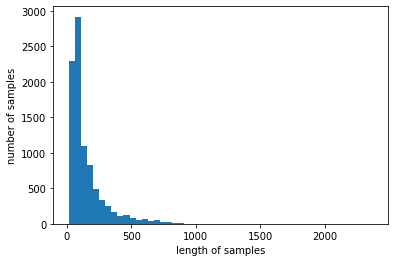

In [5]:
# 텍스트 길이 통계 분석
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

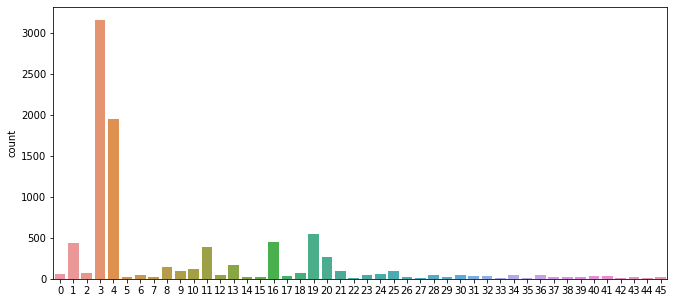

In [6]:
# 클래스별 샘플 개수 분포
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

In [7]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

565248/550378 [==============================] - 0s 0us/step


In [8]:
index_to_word = {index+3 : word for word, index in word_index.items()}

# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

In [9]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [10]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [11]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

2246


In [12]:
x_train[:5]

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 '<sos> generale de banque sa lt <unk> br and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa <unk> factors generale de banque said in a statement it gave no financial details of the transaction sa <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3',
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for o

In [13]:
x_test[:5]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt <unk> <unk> of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration <unk> chairman <unk> yulo said yulo told reuters a survey during the curren

### 단어 벡터화

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [15]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
x_test_dtm = dtmvector.transform(x_test)

In [16]:
tfidf_transformer = TfidfTransformer()
tfidf_train = tfidf_transformer.fit_transform(x_train_dtm)
tfidf_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환
print(tfidf_train.shape)

(8982, 7772)


### 머신러닝 모델 훈련 & 테스트

In [17]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score

1) Naive Bayes

In [18]:
model = MultinomialNB()
model.fit(tfidf_train, y_train)

MultinomialNB()

In [19]:
predicted = model.predict(tfidf_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("F1-Score: ", f1_score(y_test, predicted, average='weighted'))

정확도: 0.6625111308993766
F1-Score:  0.5832772940898228


2) Complement Naive Bayes Classifier(CNB)

In [20]:
cb = ComplementNB()
cb.fit(tfidf_train, y_train)

ComplementNB()

In [21]:
predicted = cb.predict(tfidf_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("F1-Score: ", f1_score(y_test, predicted, average='weighted'))

정확도: 0.7707034728406055
F1-Score:  0.7468888117983166


3) Logistic Regression

In [22]:
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(tfidf_train, y_train)

LogisticRegression(C=10000, max_iter=3000)

In [23]:
predicted = lr.predict(tfidf_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("F1-Score: ", f1_score(y_test, predicted, average='weighted'))

정확도: 0.8058771148708815
F1-Score:  0.800712549090698


4) Support Vector Machine

In [24]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(tfidf_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1000, dual=False, max_iter=3000, penalty='l1')

In [25]:
predicted = lsvc.predict(tfidf_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("F1-Score: ", f1_score(y_test, predicted, average='weighted'))

정확도: 0.7773820124666073
F1-Score:  0.7733190535155291


5) Decision Tree

In [26]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidf_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [27]:
predicted = tree.predict(tfidf_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("F1-Score: ", f1_score(y_test, predicted, average='weighted'))

정확도: 0.6206589492430988
F1-Score:  0.5741562924518827


6) Random Forest

In [28]:
forest = RandomForestClassifier(5, random_state=0)
forest.fit(tfidf_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [29]:
predicted = forest.predict(tfidf_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("F1-Score: ", f1_score(y_test, predicted, average='weighted'))

정확도: 0.6669634906500446
F1-Score:  0.6386081274272609


7) Gradient Boosting

In [30]:
grbt = GradientBoostingClassifier(random_state=0)
grbt.fit(tfidf_train, y_train)

GradientBoostingClassifier(random_state=0)

In [31]:
predicted = grbt.predict(tfidf_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("F1-Score: ", f1_score(y_test, predicted, average='weighted'))

정확도: 0.7644701691896705
F1-Score:  0.7602265349360933


8) Voting

In [18]:
voting_classifier =  VotingClassifier(estimators=[('lr', LogisticRegression(penalty='l2')),
                                                  ('gb', GradientBoostingClassifier()), 
                                                  ('nb', ComplementNB())],
                                      voting='soft')
voting_classifier.fit(tfidf_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('gb', GradientBoostingClassifier()),
                             ('nb', ComplementNB())],
                 voting='soft')

In [19]:
predicted = voting_classifier.predict(tfidf_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("F1-Score: ", f1_score(y_test, predicted, average='weighted'))

정확도: 0.794746215494212
F1-Score:  0.790798791513072


### 결과
- DTM에 tf-idf를 적용한 경우를 num_words별로 비교분석<br><br>
![Image](https://github.com/user-attachments/assets/f500ef2e-2af6-44c8-a21a-4d28cc81bd2b)
![Image](https://github.com/user-attachments/assets/b072ef45-6b67-4838-a64a-ce490b87a72b)

### 회고
- 결정 트리 기반의 머신러닝 모델에서 input feature의 크기가 늘어나면 오버피팅이 쉽게 일어난다는 것으로 알려져 있고, 실제 실험에서도 이를 관찰할 수 있었다.
- 이외에 다른 모델에서도 vocab_size가 늘어난다고 해서 성능이 증가하는 경향성이 나타나진 않았으며 오히려 감소하는 경우도 확인되었다.

#### to-do
1) DTM에 tf-idf를 적용하지 않은 상태에서 vocab_size별로 모델별 성능 분석
2) LSA로 토픽 모델링을 했을 때 토픽 개수에 따른 모델들의 성능 분석